https://archive.ics.uci.edu/ml/datasets/Energy+efficiency

X1 Relative Compactness  
X2 Surface Area  
X3 Wall Area  
X4 Roof Area  
X5 Overall Height  
X6 Orientation  
X7 Glazing Area  
X8 Glazing Area Distribution  
y1 Heating Load  
y2 Cooling Load  



Data Analysis Objective 1: Based on the 8 parameters, X1 - X8 collected about the building , need to find the equation for:   
y1 : Heating Load  
y2 : Cooling Load  

Data Analysis Objective 2: Based on the equation find the optimal parameters for the least:     
y1 : Heating Load  
y2 : Cooling Load  

This notebook is for the EDA of energy data . 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
energy_data = pd.read_excel("ENB2012_data.xlsx")

In [3]:
## Looking into file and their columns .

def file_details(filename):

    print(filename.head())
    print("\n")
    print(filename.info())
    print("\n")
    print(filename.isnull().sum())

In [4]:
file_details(energy_data)

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None


X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


In [5]:
energy_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Text(0.5,0.98,'Distributions of X1, X2 and X3')

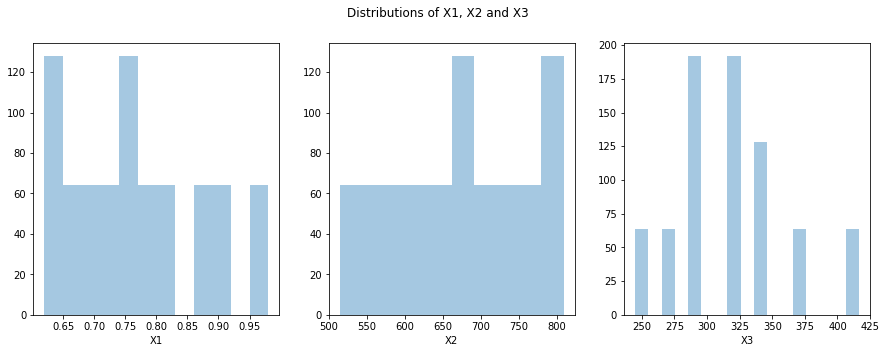

In [6]:
## Look into the distribution of each of the 8 variables
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
ax1 = sns.distplot(energy_data['X1'], kde = False)
plt.subplot(1,3,2)
ax2 = sns.distplot(energy_data['X2'], kde = False)
plt.subplot(1,3,3)
ax3 = sns.distplot(energy_data['X3'], kde = False)
plt.suptitle("Distributions of X1, X2 and X3")


Text(0.5,0.98,'Distributions of X4, X5 and X6')

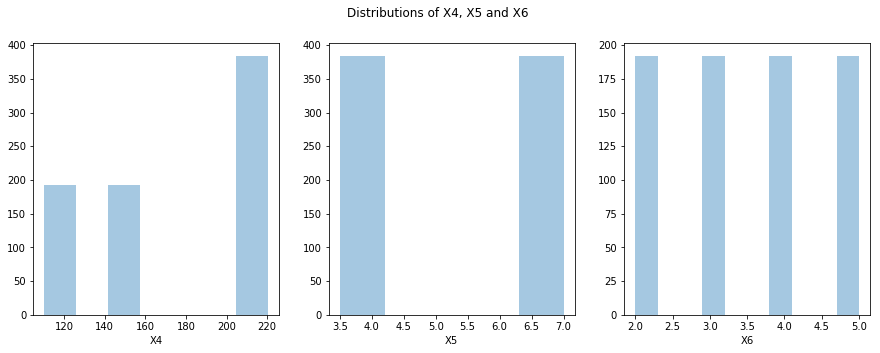

In [7]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
ax1 = sns.distplot(energy_data['X4'], kde = False)
plt.subplot(1,3,2)
ax2 = sns.distplot(energy_data['X5'], kde = False)
plt.subplot(1,3,3)
ax3 = sns.distplot(energy_data['X6'], kde = False)
plt.suptitle("Distributions of X4, X5 and X6")


Text(0.5,0.98,'Distributions of X7 and X8')

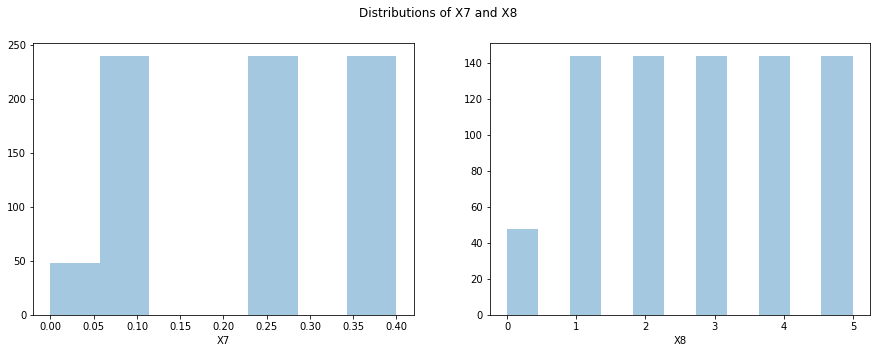

In [20]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
ax1 = sns.distplot(energy_data['X7'], kde = False)
plt.subplot(1,2,2)
ax2 = sns.distplot(energy_data['X8'], kde = False)
plt.suptitle("Distributions of X7 and X8")


Some variables though continous seem to have level data.  

In [8]:
energy_data['X3'].value_counts()

318.5    192
294.0    192
343.0    128
367.5     64
245.0     64
269.5     64
416.5     64
Name: X3, dtype: int64

In [9]:
energy_data['X4'].value_counts()

220.50    384
147.00    192
122.50    128
110.25     64
Name: X4, dtype: int64

In [10]:
energy_data['X5'].value_counts()

3.5    384
7.0    384
Name: X5, dtype: int64

In [11]:
energy_data['X6'].value_counts()

5    192
4    192
3    192
2    192
Name: X6, dtype: int64

In [12]:
energy_data['X7'].value_counts()

0.40    240
0.10    240
0.25    240
0.00     48
Name: X7, dtype: int64

In [13]:
energy_data['X1'].value_counts()

0.90    64
0.79    64
0.71    64
0.66    64
0.98    64
0.64    64
0.86    64
0.76    64
0.74    64
0.82    64
0.62    64
0.69    64
Name: X1, dtype: int64

In [14]:
energy_data['X2'].value_counts()

563.5    64
735.0    64
686.0    64
637.0    64
808.5    64
514.5    64
759.5    64
710.5    64
661.5    64
612.5    64
784.0    64
588.0    64
Name: X2, dtype: int64

For all the variables X1 - X8 , through values are continous , there seem to be some kind of levels.  

Looking into distribution of target variables.  

Text(0.5,0.98,'Distributions of Y1 and Y2')

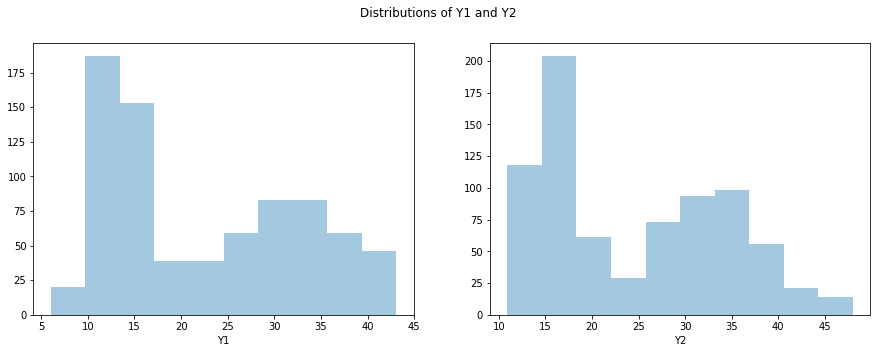

In [15]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
ax1 = sns.distplot(energy_data['Y1'], kde = False)
plt.subplot(1,2,2)
ax2 = sns.distplot(energy_data['Y2'], kde = False)
plt.suptitle("Distributions of Y1 and Y2")


Text(0.5,0.98,'Distributions of log transformation of Y1 and Y2')

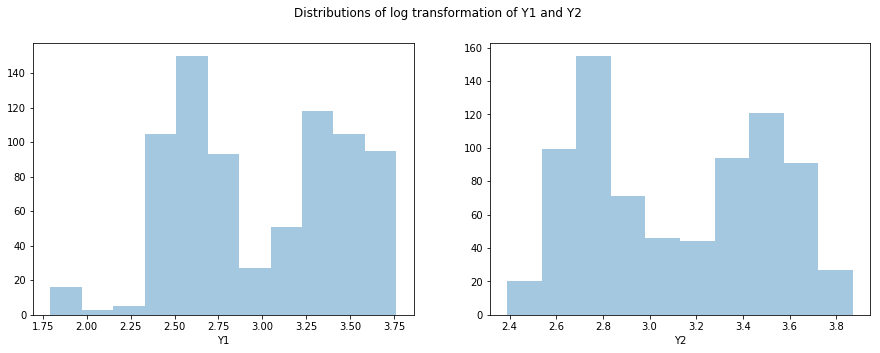

In [9]:
## Log transformation of target variables.
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
ax1 = sns.distplot(np.log(energy_data['Y1']), kde = False)
plt.subplot(1,2,2)
ax2 = sns.distplot(np.log(energy_data['Y2']), kde = False)
plt.suptitle("Distributions of log transformation of Y1 and Y2")


The outcome variables, Heating Load and Cooling Load are continous variables.  

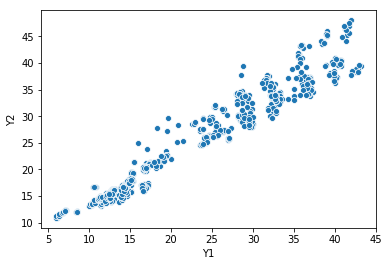

In [16]:
sns.scatterplot('Y1','Y2', data = energy_data)

In [17]:
energy_data.corr()[['Y1']]

,Y1
X1,0.622272
X2,-0.658120
X3,0.455671
X4,-0.861828
X5,0.889430
X6,-0.002587
X7,0.269842
X8,0.087368
Y1,1.000000
Y2,0.975862


In [18]:
energy_data.corr()[['Y2']]

,Y2
X1,0.634339
X2,-0.672999
X3,0.427117
X4,-0.862547
X5,0.895785
X6,0.014290
X7,0.207505
X8,0.050525
Y1,0.975862
Y2,1.000000


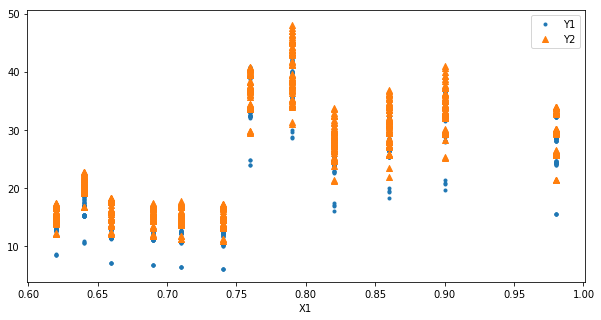

In [19]:
plt.figure(figsize = (10,5))
plt.scatter(energy_data['X1'], energy_data['Y1'], marker = '.',label = 'Y1')
plt.scatter(energy_data['X1'], energy_data['Y2'], marker = '^', label = 'Y2')
plt.xlabel('X1')
plt.legend()
plt.show()


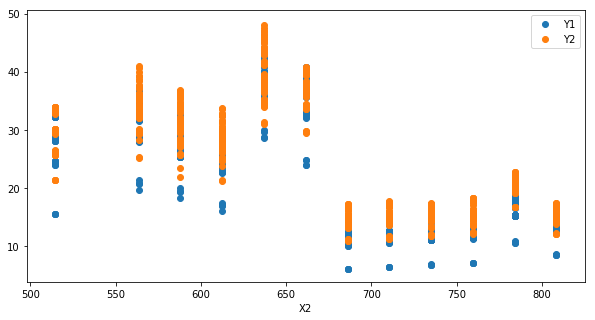

In [20]:
plt.figure(figsize = (10,5))
plt.scatter(energy_data['X2'], energy_data['Y1'], label = 'Y1')
plt.scatter(energy_data['X2'], energy_data['Y2'], label = 'Y2')
plt.xlabel('X2')
plt.legend()
plt.show()


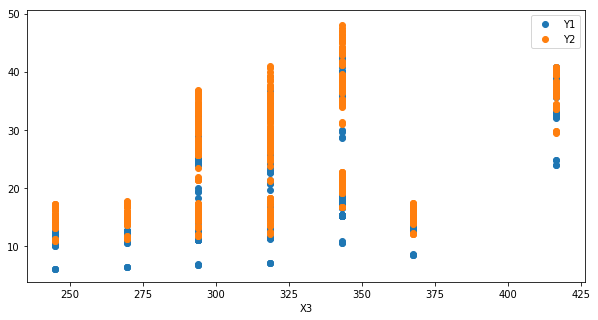

In [21]:
plt.figure(figsize = (10,5))
plt.scatter(energy_data['X3'], energy_data['Y1'], label = 'Y1')
plt.scatter(energy_data['X3'], energy_data['Y2'], label = 'Y2')
plt.xlabel('X3')
plt.legend()
plt.show()


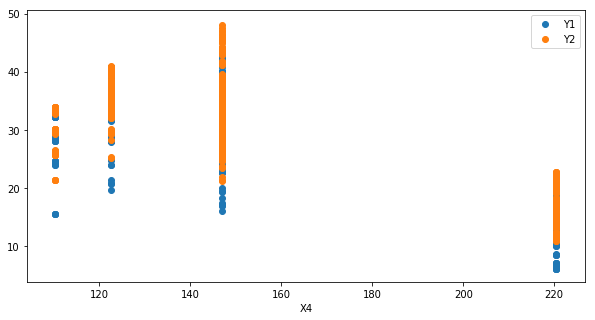

In [22]:
plt.figure(figsize = (10,5))
plt.scatter(energy_data['X4'], energy_data['Y1'], label = 'Y1')
plt.scatter(energy_data['X4'], energy_data['Y2'], label = 'Y2')
plt.xlabel('X4')
plt.legend()
plt.show()


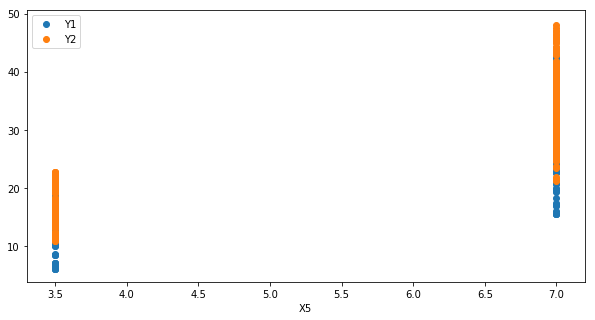

In [23]:
plt.figure(figsize = (10,5))
plt.scatter(energy_data['X5'], energy_data['Y1'], label = 'Y1')
plt.scatter(energy_data['X5'], energy_data['Y2'], label = 'Y2')
plt.xlabel('X5')
plt.legend()
plt.show()


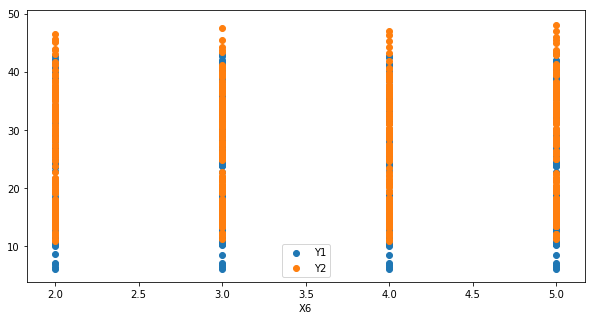

In [24]:
plt.figure(figsize = (10,5))
plt.scatter(energy_data['X6'], energy_data['Y1'], label = 'Y1')
plt.scatter(energy_data['X6'], energy_data['Y2'], label = 'Y2')
plt.xlabel('X6')
plt.legend()
plt.show()


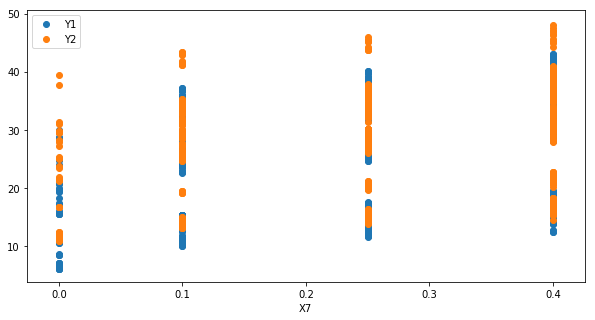

In [25]:
plt.figure(figsize = (10,5))
plt.scatter(energy_data['X7'], energy_data['Y1'], label = 'Y1')
plt.scatter(energy_data['X7'], energy_data['Y2'], label = 'Y2')
plt.xlabel('X7')
plt.legend()
plt.show()


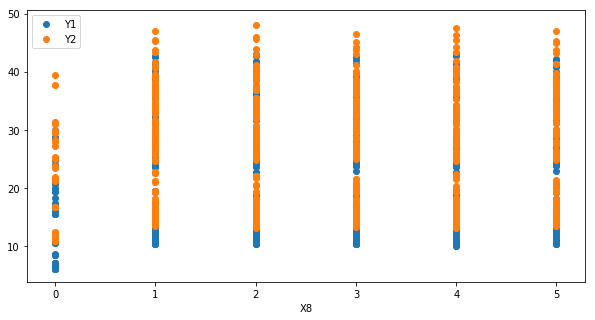

In [26]:
plt.figure(figsize = (10,5))
plt.scatter(energy_data['X8'], energy_data['Y1'], label = 'Y1')
plt.scatter(energy_data['X8'], energy_data['Y2'], label = 'Y2')
plt.xlabel('X8')
plt.legend()
plt.show()
